In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# Collaboration graph

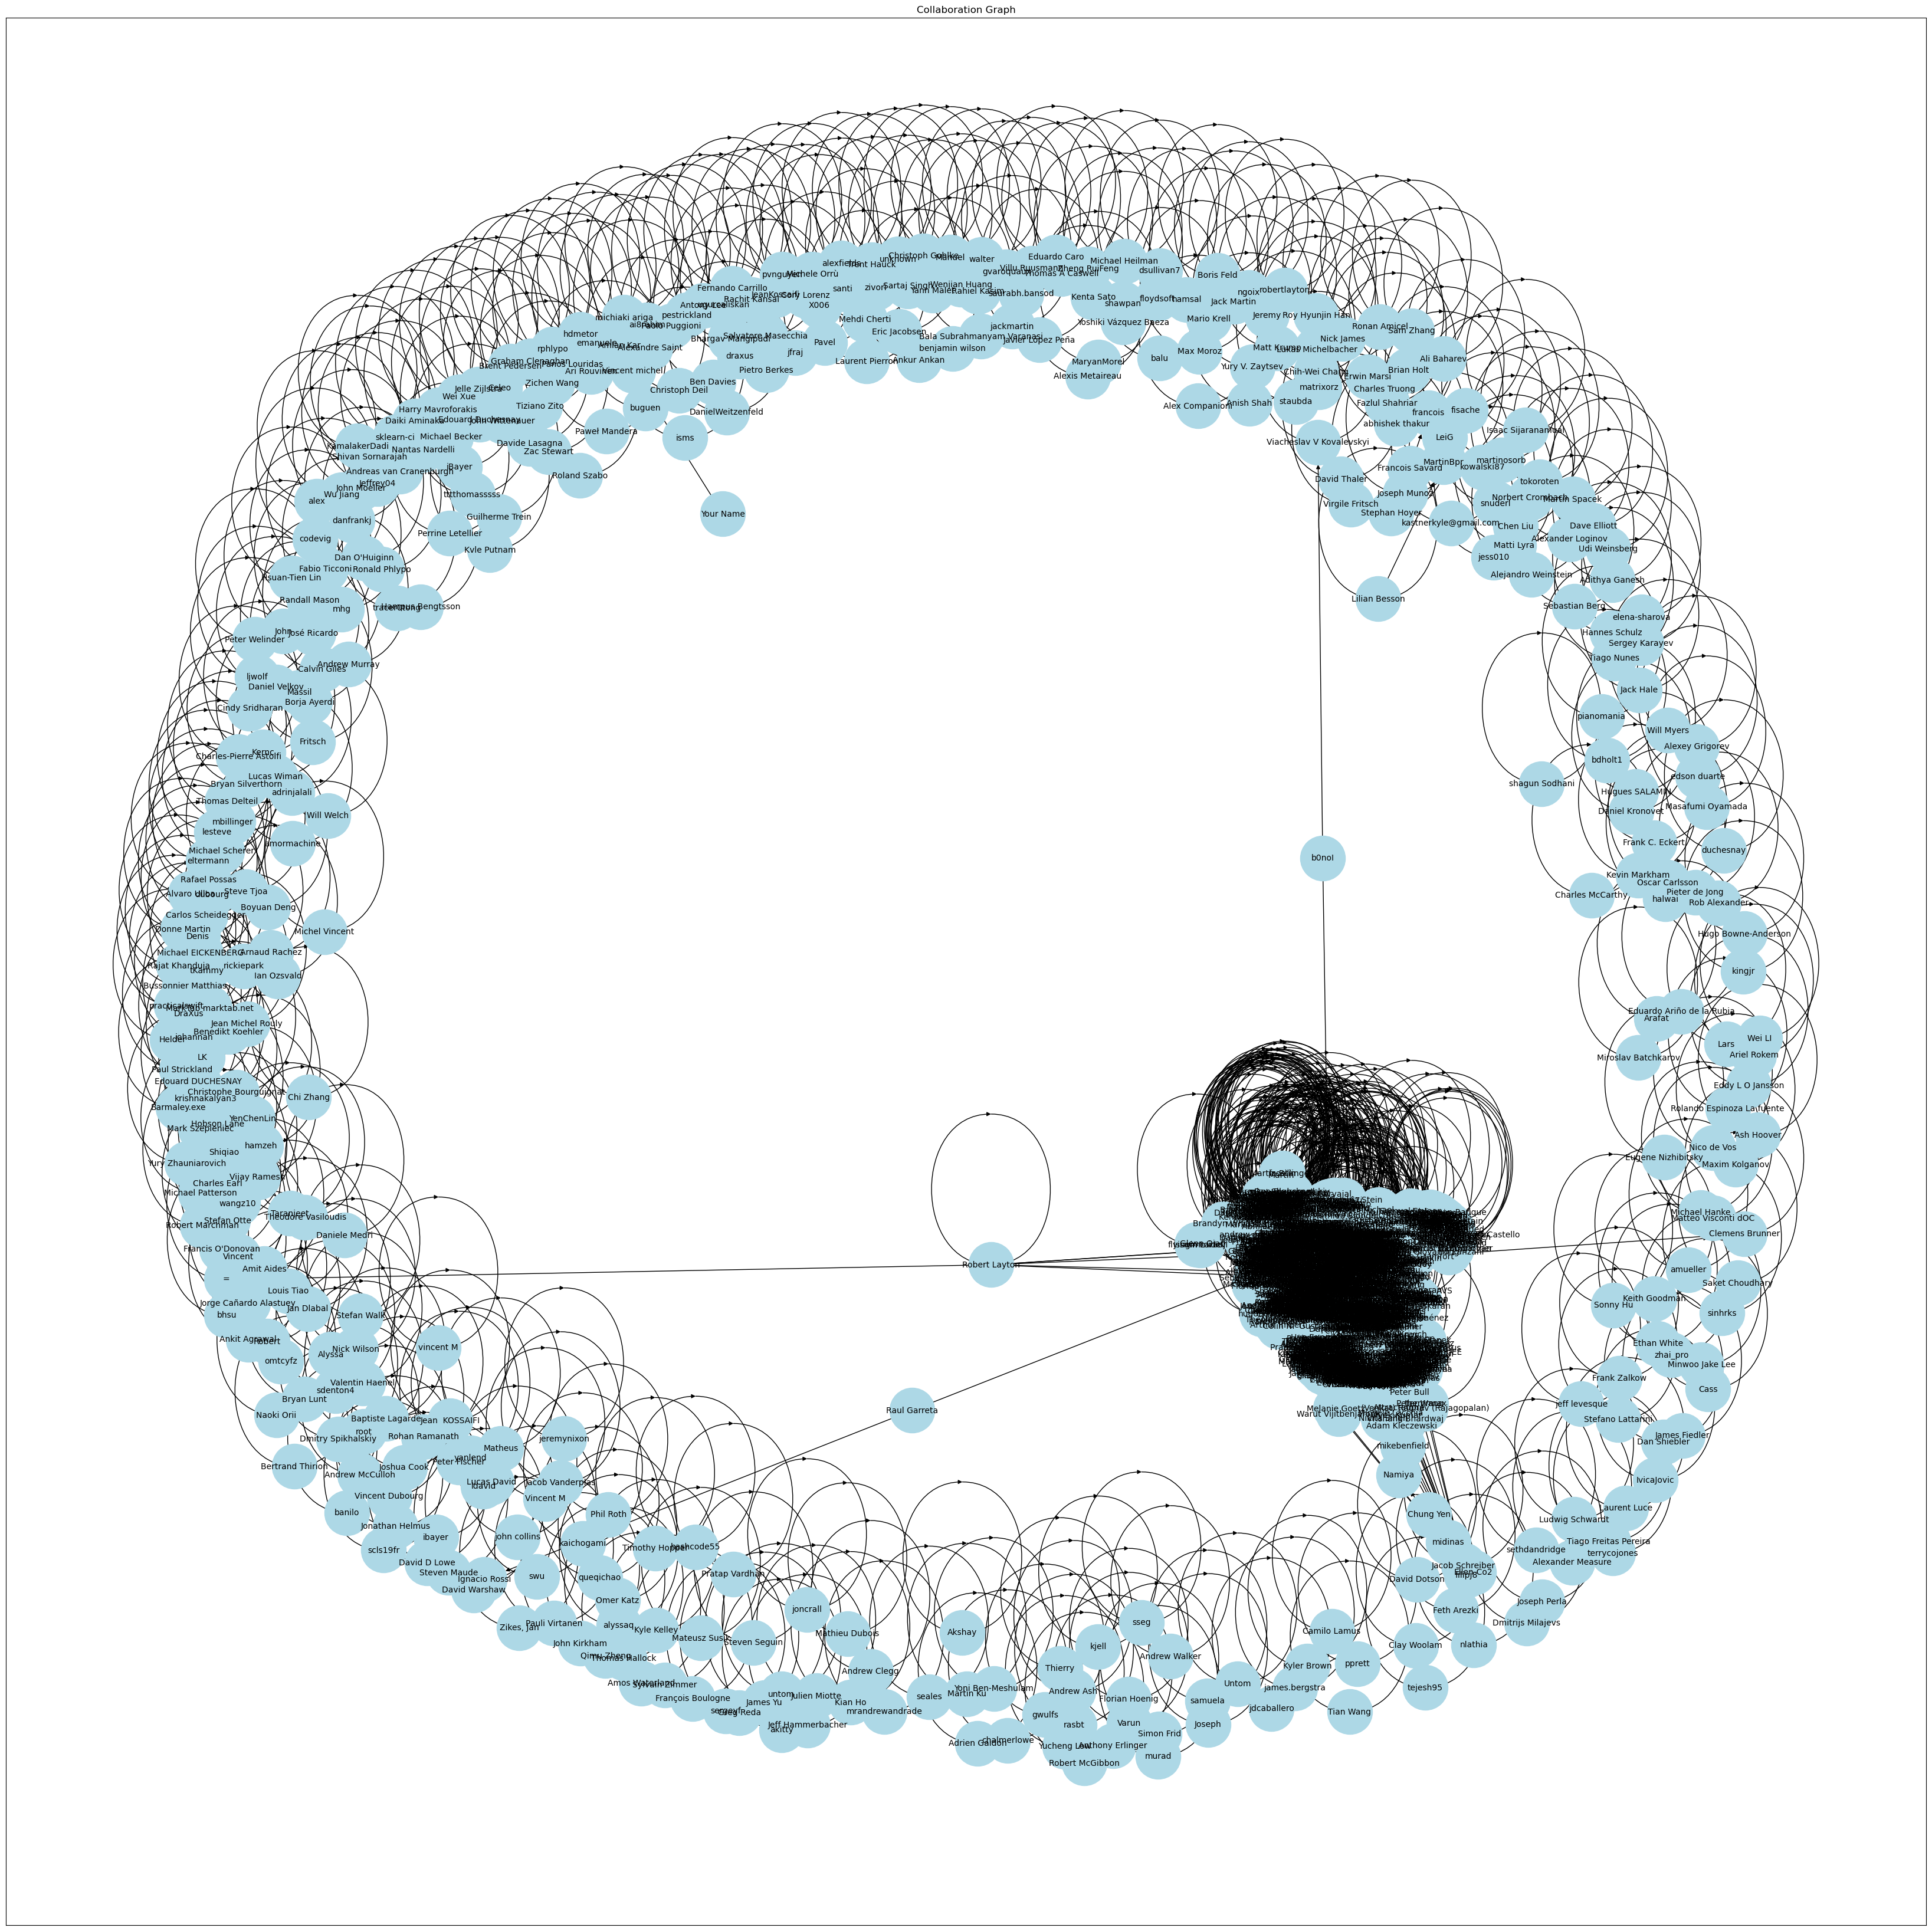

In [34]:
# Read data from the CSV file into a DataFrame
csv_file = '.\\git_log.csv'
df = pd.read_csv(csv_file, delimiter=',')
df.head()
# Filter rows where the "Committer" column is not equal to "GitHub"
df_filtered = df[df['Committer'] != 'GitHub']

# Optionally, you can reset the index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)
# Create a directed graph using networkx
G = nx.DiGraph()
# Iterate through each row in the DataFrame
#for _, row in df.iterrows():
for _, row in df_filtered.iterrows():
    author = row['Author']
    committer = row['Committer']

    # Add edges to the graph to represent collaboration
    G.add_edge(author, committer)

# Draw the collaboration graph
plt.figure(figsize=(42, 42))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_color='black')
plt.title('Collaboration Graph')
plt.show()
# Hide warning
warnings.filterwarnings("default")

# Communication graph

In [ ]:
# Read data from the CSV file into a DataFrame
csv_file = '.\\github_issues.csv'
df = pd.read_csv(csv_file, delimiter=',')

# Create a directed graph using networkx
G = nx.DiGraph()

# Iterate through each row in the DataFrame
for _, row in df.iterrows():
    issue_number = row['number']
    user = row['user']
    comments = row['comments']

    # Add nodes for the issue and the user
    G.add_node(issue_number, type='issue')
    G.add_node(user, type='user')

    # Add an edge to represent the user's comment on the issue
    G.add_edge(user, issue_number, type='comment', comments=comments)

# Draw the communication graph
plt.figure(figsize=(42, 42))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_color='black')
plt.title('Communication Graph (Issues and Comments)')
plt.show()
# Hide warning
warnings.filterwarnings("default")